In [17]:
"""
# Honor Statement

Name: Zhuoran Wu

E-mail: <zw118@georgetown.edu>

Platform: Windows

In accordance with the class policies and Georgetown's Honor Code,
I certify that, with the exceptions of the class resources and those
items noted below, I have neither given nor received any assistance
on this project.

Assignment 0

1 Regularization.

Using the accompanying Hitters dataset (found here (Links to an external site.)Links to an external site.), we will explore regression models to predict a player's Salary from other variables. You can use any programming languages or frameworks that you wish.

1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors).
1.1.1. Create a visualization of the coefficient trajectories
       
       Please refer the plot graph showed below.
       
1.1.2. Comment on which are the final three predictors that remain in the model
       
       The final thress predictors (or at least top 3) are: Hits, CRBI, CRuns
       
1.1.3. Use cross-validation to find the optimal value of the regularization penalty
       
       The optimal value of the penalty is: 0.0635481759985745
       
1.1.4. How many predictors are left in that model?
       
       6.

1.2 Repeat with Ridge Regression.
1.2.1 Visualize the coefficient trajectories

      Please refer the plot graph showed below.

1.2.2 Use cross-validation to find the optimal value of the regularization penalty

      The optimal value of the penalty is: 0.8340502686000313



2 Short Answer.

2.1 Explain in your own words the bias-variance tradeoff.
    In Machine Learning Model, We would like to train a model with low bias and low variance. However, in real world,
    We could not reach this point. In this case, we need a tradeoff for variance and bias.
    In a real model, if we reach a low bias, we will have a high variance, vice versa.
    The reason why this tradeoff exists is that we always want to estimate infinite real world data according to
    limit data we have. If we trust the limit data we have, we will get a overfitting model with low bias and
    high variance. But if we want to trust the prior knowledge of model, we will reach a relative high bias.

2.2 What role does regularization play in this tradeoff?

    Regularization is a process of introducing additional information
    in order to solve an ill posed problem or to prevent overfitting.

2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance

    According to the remain predictors in Lasso and Ridge models, we found that Lasso simplify the predictors into 3, 
    which means that it gave up some accuracy of model to reach an easy and explainable model. However, when we compare the MSE, 
    we could find that the best MSE for Lasso CV is 93489.65522837336, and the best of Ridge is 93332.208063292.
    
    We found that Ridge perform better than Lasso, but Lasso is easier than Ridge model. This is the result of bias and variance trade off.
    Lasso Model has more bias but less variance, but Ridge has less bias but more variance.
"""

"\n# Honor Statement\n\nName: Zhuoran Wu\n\nE-mail: <zw118@georgetown.edu>\n\nPlatform: Windows\n\nIn accordance with the class policies and Georgetown's Honor Code,\nI certify that, with the exceptions of the class resources and those\nitems noted below, I have neither given nor received any assistance\non this project.\n\nAssignment 0\n\n1 Regularization.\n\nUsing the accompanying Hitters dataset (found here (Links to an external site.)Links to an external site.), we will explore regression models to predict a player's Salary from other variables. You can use any programming languages or frameworks that you wish.\n\n1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors).\n1.1.1. Create a visualization of the coefficient trajectories\n       \n       Please refer the plot graph showed below.\n       \n1.1.2. Comment on which are the final three predictors that remain in the model\n       \n       The final thress predi

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

%matplotlib inline

In [19]:
RANDOM_SEED = 19960214
MAX_ITER = 50000
CV_FOLDER = 10
TEST_SIZE = 0.2
LASSO_ALPHA = 10
RIDGE_ALPHA = 4

In [20]:
# Read Data
hitters = pd.read_csv("Hitters.csv", sep=",")

# Drop NaN and Name Column
hitter_df = hitters.dropna().drop(['Name'], axis=1)

# Drop Category Column and get label Salary Column
hitter_df = hitter_df.drop(['League', 'Division', 'NewLeague'], axis=1)
y = hitter_df['Salary']
hitter_df = hitter_df.drop(['Salary'], axis=1)
x = hitter_df.astype('float64')

# Cross Validation
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

Visualization of the coefficient trajectories with Lasso


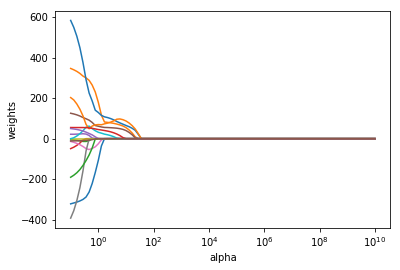

Final three predictors that remain in the Lasso model:


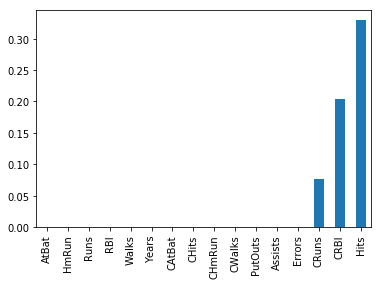

The optimal value of the penalty with Lasso Cross Validation: 
0.0635481759985745
Lasso MSE with best Alpha
93489.65522837336


In [21]:
# Lasso Regression
lasso = Lasso(max_iter=MAX_ITER, normalize=True)
lasso_coefs = []

alphas = 10 ** np.linspace(10, -1, 100) * 0.5

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(scale(x_train), y_train)
    lasso_coefs.append(lasso.coef_)


print('Visualization of the coefficient trajectories with Lasso')
ax = plt.gca()
ax.plot(alphas * 2, lasso_coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

lasso = Lasso(alpha=LASSO_ALPHA, max_iter=MAX_ITER, normalize=True)
lasso.fit(x, y)
print('Final three predictors that remain in the Lasso model:')
pd.Series(lasso.coef_, index=x.columns).sort_values().plot(kind='bar')
plt.show()

lasso_cv = LassoCV(alphas=None, cv=CV_FOLDER, max_iter=MAX_ITER, normalize=True)
lasso_cv.fit(x, y)
lasso.set_params(alpha=lasso_cv.alpha_)
lasso.fit(x_train, y_train)
lasso_mse = mean_squared_error(y_test, lasso.predict(x_test))
print('The optimal value of the penalty with Lasso Cross Validation: ')
print(lasso_cv.alpha_)
# pd.Series(lasso_cv.coef_, index=x.columns).sort_values().plot(kind='bar')
print('Lasso MSE with best Alpha')
print(lasso_mse)
# print(pd.Series(lasso.coef_, index=x.columns))

Visualization of the coefficient trajectories with Ridge


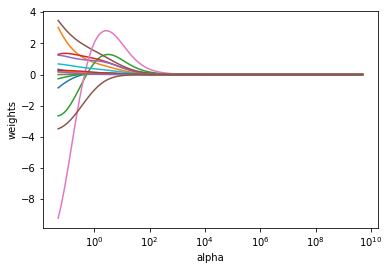

Final predictors that remain in the Ridge model:


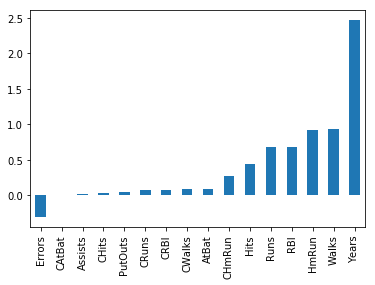

The optimal value of the penalty with Ridge Cross Validation:
0.05
Ridge MSE with best Alpha
93332.208063292


In [22]:
# Ridge Regression

ridge = Ridge(normalize=True)
ridge_coefs = []

for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(x, y)
    ridge_coefs.append(ridge.coef_)

print('Visualization of the coefficient trajectories with Ridge')
ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

print('Final predictors that remain in the Ridge model:')
ridge_alpha = Ridge(alpha=RIDGE_ALPHA, normalize=True)
ridge_alpha.fit(x_train, y_train)
pred2 = ridge_alpha.predict(x_test)
ridge_mse = mean_squared_error(y_test, pred2)
pd.Series(ridge_alpha.coef_, index=x.columns).sort_values().plot(kind='bar')
plt.show()
# print(ridge_mse)
# print(pd.Series(ridge_alpha.coef_, index=x.columns))

ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
ridge_cv.fit(x, y)
print('The optimal value of the penalty with Ridge Cross Validation:')
print(ridge_cv.alpha_)

ridge.set_params(alpha=ridge_cv.alpha_)
ridge.fit(x_train, y_train)
ridge_mse = mean_squared_error(y_test, ridge.predict(x_test))
print('Ridge MSE with best Alpha')
print(ridge_mse)